In [1]:
import glob as glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as sp

# Part 1: Find best RFC parameters

In [2]:
# with the hyperparameter optimization for RFC results, calculate best model
cols = ['num', 'numbits', 'radius', 'classweight', 'num trees']
df = pd.DataFrame(columns = cols)

numbits = [512, 1024, 2048, 4096] # length of fingerprint
radius = [2, 3, 4] # radius of fingerprint
classweight = ['balanced']
numtrees = [50, 100, 250, 500, 750, 1000, 2000] # number of trees in random forest

# loop through parameters and initialize a blank dataframe
model_dir = 0
for l in numbits:
    for d in radius:
        for h in classweight:
            for f in numtrees:
                new_row = [model_dir, l, d, h, f]
                new = pd.DataFrame(new_row).T
                new.columns = cols
                df = pd.concat([df, new], ignore_index = True)   
                model_dir = model_dir + 1

# initialize the best inhibition AUC and best killing AUC
df['inh mean auc'] = [0] * len(df)
df['kill mean auc'] = [0] * len(df)
best_yet = 0
best_yet_index = ''

# loop through existing directory of files and grab metrics
for name in glob.glob('../models/rfc_hyperopt_final/**/test_scores.csv', recursive = True): 
    try:
        clean_num = int(name.split("rfc_hyperopt_final/")[1].split("/")[0])
    except Exception as e:
        print(e)
        print(name)
        continue
    new = pd.read_csv(name) 
    inh_mean_auc = float(list(new['Mean auc'])[0])
    kill_mean_auc = float(list(new['Mean auc'])[1])

    df.iloc[clean_num, df.columns.get_loc("inh mean auc")] = inh_mean_auc
    df.iloc[clean_num, df.columns.get_loc("kill mean auc")] = kill_mean_auc

    if kill_mean_auc > best_yet: # if this is the best result so far, keep it
        best_yet = kill_mean_auc
        best_yet_index = name

# print best metrics
print('best')
print(best_yet)
print(best_yet_index)

best
0.7216783014964255
../models/rfc_hyperopt_final/76/test_scores.csv


In [3]:
# let's look at the parameters of the best model
df.to_csv('../models/final_hyperopt_shallow_models_for_pub/rfc_hyperopt_results.csv', index = False)
df.iloc[76,:]

num                    76
numbits              4096
radius                  3
classweight      balanced
num trees            2000
inh mean auc     0.810184
kill mean auc    0.721678
Name: 76, dtype: object

# Part 2: Find best SVM parameters

## Inhibition SVM parameters

In [4]:
# with the hyperparameter optimization for SVM - inhibition results, calculate best model
cols = ['num', 'numbits', 'radius', 'classweight']
df = pd.DataFrame(columns = cols)

numbits = [512, 1024, 2048, 4096] # length of fingerprint
radius = [2, 3, 4] # radius of fingerprint
classweight = ['balanced']

# loop through parameters and initialize a blank dataframe
model_dir = 0
for l in numbits:
    for d in radius:
        for h in classweight:
            new_row = [model_dir, l, d, h]
            new = pd.DataFrame(new_row).T
            new.columns = cols
            df = pd.concat([df, new], ignore_index = True)   
            model_dir = model_dir + 1

# initialize the best inhibition AUC
df['inh mean auc'] = [0] * len(df)
best_yet = 0
best_yet_index = ''

# loop through existing directory of files and grab metrics
for name in glob.glob('../models/svm_inh_hyperopt_final/**/test_scores.csv', recursive = True): 
    try:
        clean_num = int(name.split("svm_inh_hyperopt_final/")[1].split("/")[0])
    except Exception as e:
        print(e)
        print(name)
        continue
    # due to an oversight where I kept in the 'trees' argument, only every 7th model is actually unique
    if clean_num % 7 !=0:
        continue
    clean_num = int(float(clean_num) / 7)
        
    new = pd.read_csv(name) 
    inh_mean_auc = float(list(new['Mean auc'])[0])
    df.iloc[clean_num, df.columns.get_loc("inh mean auc")] = inh_mean_auc

    if inh_mean_auc > best_yet: # if this is the best result so far, keep it
        best_yet = inh_mean_auc
        best_yet_index = name

# print best metrics
print('best')
print(best_yet)
print(best_yet_index)

best
0.8200898826951208
../models/svm_inh_hyperopt_final/63/test_scores.csv


In [5]:
# let's look at the parameters of the best model
df.to_csv('../models/final_hyperopt_shallow_models_for_pub/svm_inh_hyperopt_results.csv', index = False)
df.iloc[9,:]

num                    9
numbits             4096
radius                 2
classweight     balanced
inh mean auc     0.82009
Name: 9, dtype: object

## Killing SVM parameters

In [6]:
# with the hyperparameter optimization for SVM - killing results, calculate best model
cols = ['num', 'numbits', 'radius', 'classweight']
df = pd.DataFrame(columns = cols)

numbits = [512, 1024, 2048, 4096] # length of fingerprint
radius = [2, 3, 4] # radius of fingerprint
classweight = ['balanced']

# loop through parameters and initialize a blank dataframe
model_dir = 0
for l in numbits:
    for d in radius:
        for h in classweight:
            new_row = [model_dir, l, d, h]
            new = pd.DataFrame(new_row).T
            new.columns = cols
            df = pd.concat([df, new], ignore_index = True)   
            model_dir = model_dir + 1

# initialize the best killing AUC
df['kill mean auc'] = [0] * len(df)
best_yet = 0
best_yet_index = ''

# loop through existing directory of files and grab metrics
for name in glob.glob('../models/svm_kill_hyperopt_final/**/test_scores.csv', recursive = True): 
    try:
        clean_num = int(name.split("svm_kill_hyperopt_final/")[1].split("/")[0])
    except Exception as e:
        print(e)
        print(name)
        continue
    # due to an oversight where I kept in the 'trees' argument, only every 7th model is actually unique
    if clean_num % 7 !=0:
        continue
    clean_num = int(float(clean_num) / 7)
        
    new = pd.read_csv(name) 
    inh_mean_auc = float(list(new['Mean auc'])[0])
    df.iloc[clean_num, df.columns.get_loc("kill mean auc")] = inh_mean_auc

    if inh_mean_auc > best_yet: # if this is the best result so far, keep it
        best_yet = inh_mean_auc
        best_yet_index = name

# print best metrics
print('best')
print(best_yet)
print(best_yet_index)

best
0.7531393808752446
../models/svm_kill_hyperopt_final/70/test_scores.csv


In [7]:
# let's look at the parameters of the best model
df.to_csv('../models/final_hyperopt_shallow_models_for_pub/svm_kill_hyperopt_results.csv', index = False)
df.iloc[10,:]

num                    10
numbits              4096
radius                  3
classweight      balanced
kill mean auc    0.753139
Name: 10, dtype: object

# Part 3: Find best FFN parameters

In [8]:
# with the hyperparameter optimization for FFN results, calculate best model
cols = ['num', 'ffn_num_layers', 'hidden_size', 'dropout']
df = pd.DataFrame(columns = cols)

# loop through parameters and initialize a blank dataframe
ffn_num_layers = [1, 2, 3, 4] # number of densely connected layers
hidden_size = [500, 1000, 1500] # size of each densely connected layer
dropout = [0.1, 0.2, 0.3] # dropout rate

# loop through parameters and initialize a blank dataframe
model_dir = 0
for f in ffn_num_layers:
    for h in hidden_size:
        for d in dropout:
            new_row = [model_dir, f, h, d]
            new = pd.DataFrame(new_row).T
            new.columns = cols
            df = pd.concat([df, new], ignore_index = True)   
            model_dir = model_dir + 1

# initialize the best inhibition AUC and best killing AUC
df['inh mean auc'] = [0] * len(df)
df['kill mean auc'] = [0] * len(df)
best_yet = 0
best_yet_index = ''

# loop through existing directory of files and grab metrics
for name in glob.glob('../models/ffn_hyperopt_final/**/test_scores.csv', recursive = True): 
    try:
        clean_num = int(name.split("ffn_hyperopt_final/")[1].split("/")[0])
    except Exception as e:
        print(e)
        print(name)
        continue
    new = pd.read_csv(name) 
    inh_mean_auc = float(list(new['Mean auc'])[0])
    kill_mean_auc = float(list(new['Mean auc'])[1])

    df.iloc[clean_num, df.columns.get_loc("inh mean auc")] = inh_mean_auc
    df.iloc[clean_num, df.columns.get_loc("kill mean auc")] = kill_mean_auc

    if kill_mean_auc > best_yet: # if this is the best result so far, keep it
        best_yet = kill_mean_auc
        best_yet_index = name

# print best metrics
print('best')
print(best_yet)
print(best_yet_index)

best
0.6590498201239524
../models/ffn_hyperopt_final/26/test_scores.csv


In [9]:
# let's look at the parameters of the best model
df.to_csv('../models/final_hyperopt_shallow_models_for_pub/ffn_hyperopt_results.csv', index = False)
df.iloc[26,:]

num                   26.0
ffn_num_layers         3.0
hidden_size         1500.0
dropout                0.3
inh mean auc      0.714677
kill mean auc      0.65905
Name: 26, dtype: object

# Part 4: Train final models with best parameters

In [10]:
# now write final optimization with 20 ensemble models each
# called script_2A_shallow_models_final_train.sh

# Part 5: Plot final model comparison

In [11]:
# initialize the columns of this dataframe
newdf = pd.DataFrame(columns = ['Value', 'Metric', 'Task', 'Model'])

# loop through final trained models for each type
labels = ['RFC', 'SVM', 'SVM', 'FFN', 'GNN']
for fold, name in zip(['FINALRFC76', 'FINALSVMINH63', 'FINALSVMKILL70', 'FINALFFN26', 'finaltrain16'], labels):

    #  grab one by one each result dataframe
    df = pd.read_csv('../models/final_hyperopt_shallow_models_for_pub/' + fold + '/test_scores.csv')
    
    # handle GNN special case
    if 'finaltrain16' in fold:
        new = pd.DataFrame()
        new['Value'] = list(df.iloc[0,3:33]) # 30 folds not 20
        new['Metric'] = ['auROC'] * len(new) 
        new['Task'] = ['Inhibition'] * len(new)
        new['Model'] = name
        newdf = newdf.append(new)
        
        new = pd.DataFrame()
        new['Value'] = list(df.iloc[1,3:33])
        new['Metric'] = ['auROC'] * len(new) 
        new['Task'] = ['Killing'] * len(new)
        new['Model'] = name
        newdf = newdf.append(new)
    
    # handle SVM kill special case
    elif 'FINALSVMKILL70' in fold:
        new['Value'] = list(df.iloc[0,3:23])
        new['Metric'] = ['auROC'] * len(new) 
        new['Task'] = ['Killing'] * len(new)
        new['Model'] = name
        newdf = newdf.append(new)

    else:
        # grab all inhibition models
        if 'KILL' not in fold:
            new = pd.DataFrame()
            new['Value'] = list(df.iloc[0,3:23])
            new['Metric'] = ['auROC'] * len(new) 
            new['Task'] = ['Inhibition'] * len(new)
            new['Model'] = name
            newdf = newdf.append(new)

        # grab non-SVM models
        if 'SVM' not in fold:
            new['Value'] = list(df.iloc[1,3:23])
            new['Metric'] = ['auROC'] * len(new) 
            new['Task'] = ['Killing'] * len(new)
            new['Model'] = name
            newdf = newdf.append(new)

# rename newdf to df
df = newdf
df

/var/folders/py/8hwb28r933z4xh4q0dw5hz2h0000gn/T/ipykernel_55386/3727171908.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdf = newdf.append(new)
/var/folders/py/8hwb28r933z4xh4q0dw5hz2h0000gn/T/ipykernel_55386/3727171908.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdf = newdf.append(new)
/var/folders/py/8hwb28r933z4xh4q0dw5hz2h0000gn/T/ipykernel_55386/3727171908.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdf = newdf.append(new)
/var/folders/py/8hwb28r933z4xh4q0dw5hz2h0000gn/T/ipykernel_55386/3727171908.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdf = newdf.append(new)
/var/folders/py/8hwb28r9

,Value,Metric,Task,Model
0,0.748471,auROC,Inhibition,RFC
1,0.900718,auROC,Inhibition,RFC
2,0.7489,auROC,Inhibition,RFC
3,0.86485,auROC,Inhibition,RFC
4,0.790008,auROC,Inhibition,RFC
...,...,...,...,...
25,0.936745,auROC,Killing,GNN
26,0.859209,auROC,Killing,GNN
27,0.804192,auROC,Killing,GNN
28,0.863203,auROC,Killing,GNN


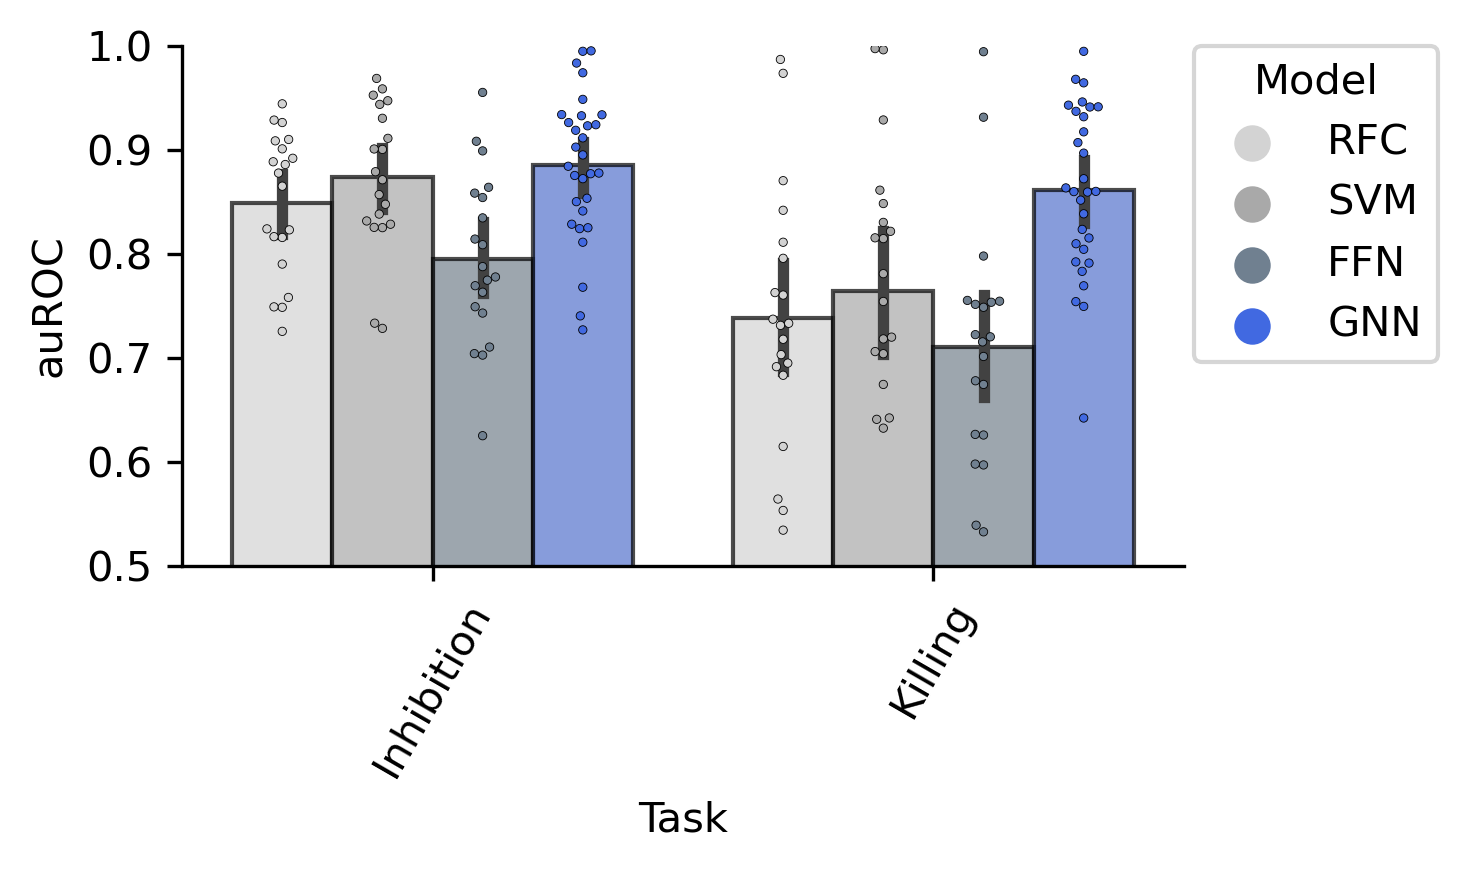

In [12]:
# plot performance of each model; separate x-axis by INHIBITION and KILLING metrics
plt.figure(figsize=(5,3), dpi=300)
my_pal = dict(zip(['RFC','SVM','FFN','GNN'], ["lightgrey", "darkgrey","slategrey", 'royalblue']))
ax = sns.barplot(data=df, x = 'Task', y = 'Value', hue = 'Model', edgecolor='black', linewidth = 1, alpha = 0.7, palette = my_pal)
sns.swarmplot(data=df, x = 'Task', y = 'Value', hue = 'Model', dodge = True, edgecolor='black', linewidth = 0.2, s = 2, label='', palette = my_pal)
handles, labs = ax.get_legend_handles_labels()
ax.legend(handles[:4], labs[:4], title='Model', bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.xlabel('Task')
plt.ylim([0.5,1.0])
plt.xticks(rotation = 60)
plt.ylabel('auROC')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [13]:
# grab statistics for inhibition task and killing task comparisons; print for ease of reference
inh = df[df['Task'] == 'Inhibition']
kill = df[df['Task'] == 'Killing']

# inhibition statistics
print('inhibition')
print('rfc vs gnn')
print(sp.mannwhitneyu(inh[inh['Model'] == 'RFC']['Value'], inh[inh['Model'] == 'GNN']['Value']))
print('ffn vs gnn')
print(sp.mannwhitneyu(inh[inh['Model'] == 'FFN']['Value'], inh[inh['Model'] == 'GNN']['Value']))
print('svm vs gnn')
print(sp.mannwhitneyu(inh[inh['Model'] == 'SVM']['Value'], inh[inh['Model'] == 'GNN']['Value']))

# killing statistics
print('\nkilling')
print('rfc vs gnn')
print(sp.mannwhitneyu(kill[kill['Model'] == 'RFC']['Value'], kill[kill['Model'] == 'GNN']['Value']))
print('ffn vs gnn')
print(sp.mannwhitneyu(kill[kill['Model'] == 'FFN']['Value'], kill[kill['Model'] == 'GNN']['Value']))
print('svm vs gnn')
print(sp.mannwhitneyu(kill[kill['Model'] == 'SVM']['Value'], kill[kill['Model'] == 'GNN']['Value']))

inhibition
rfc vs gnn
MannwhitneyuResult(statistic=213.0, pvalue=0.0433603863703196)
ffn vs gnn
MannwhitneyuResult(statistic=121.0, pvalue=0.00020402131562037324)
svm vs gnn
MannwhitneyuResult(statistic=275.0, pvalue=0.3137770660610811)

killing
rfc vs gnn
MannwhitneyuResult(statistic=117.0, pvalue=0.0001507321149812685)
ffn vs gnn
MannwhitneyuResult(statistic=74.0, pvalue=3.992878269491763e-06)
svm vs gnn
MannwhitneyuResult(statistic=162.0, pvalue=0.0032355258700416437)


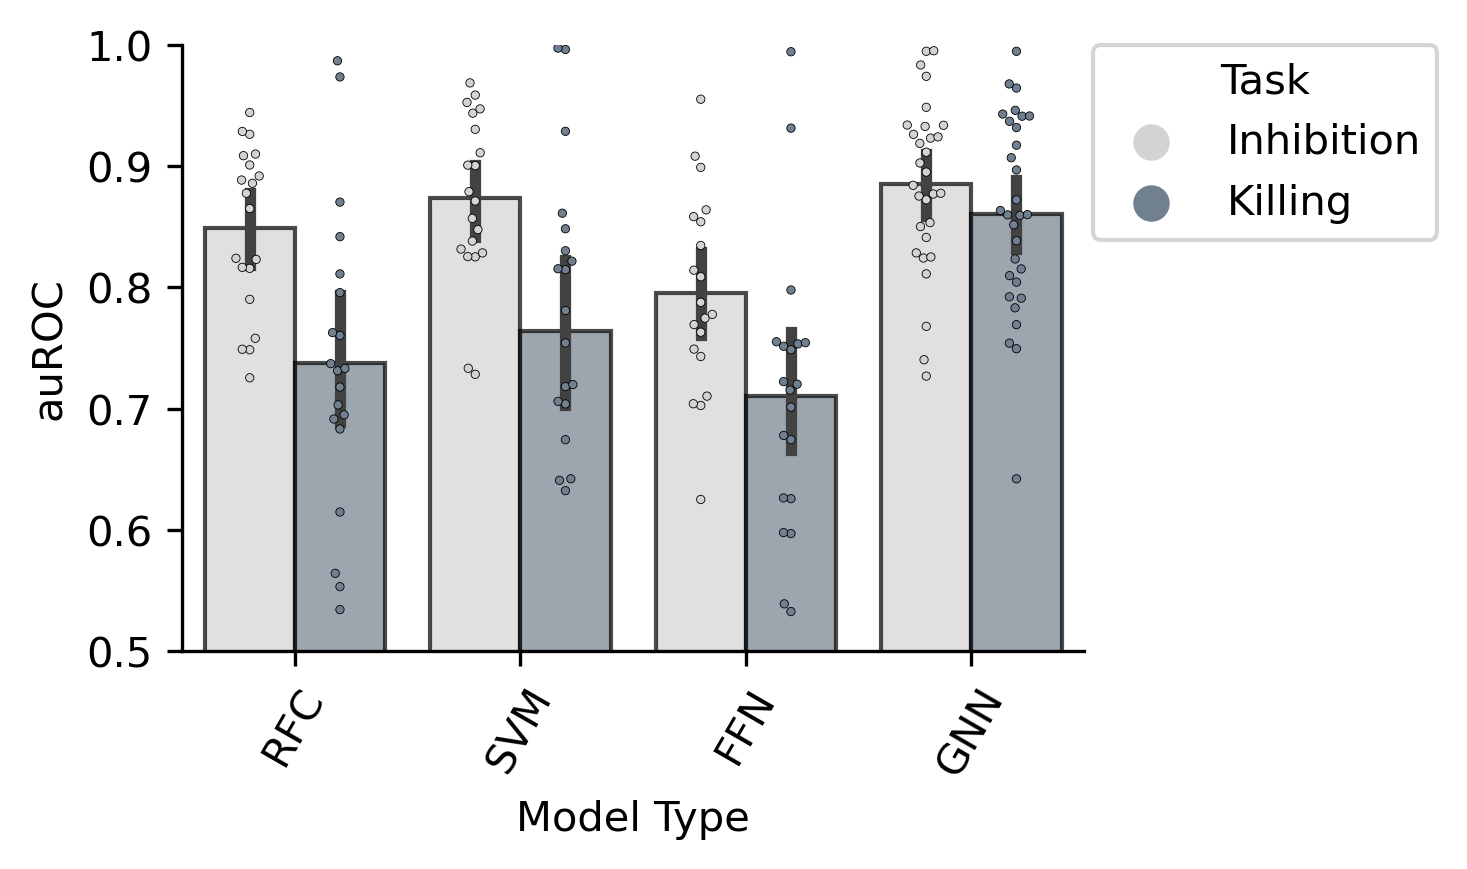

In [14]:
# plot publication quality figure where x-axis is separated by MODEL TYPE
plt.figure(figsize=(5,3), dpi=300)
my_pal = dict(zip(['Inhibition','Killing'], ["lightgrey", "slategrey"]))
ax = sns.barplot(data=df, x = 'Model', y = 'Value', hue = 'Task', edgecolor='black', linewidth = 1, alpha = 0.7, palette = my_pal)
sns.swarmplot(data=df, x = 'Model', y = 'Value', hue = 'Task', dodge = True, edgecolor='black', linewidth = 0.2, s = 2, label='', palette = my_pal)
handles, labs = ax.get_legend_handles_labels()
ax.legend(handles[:2], labs[:2], title='Task', bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.xlabel('Model Type')
plt.ylim([0.5,1.0])
plt.xticks(rotation = 60)
plt.ylabel('auROC')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('../figure_panels/2A_shallow_model_comparison_broken_by_model.png')
plt.show()